# Titanic Survival Classification Problem

The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

%matplotlib inline

In [267]:
#Read in the data
train_titanic = pd.read_csv('data/train.csv')
test_titanic = pd.read_csv('data/test.csv')
genders = pd.read_csv('data/gender_submission.csv')

#Make copies of the datasets
train = train_titanic.copy()
test = test_titanic.copy()

In [268]:
train_titanic[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [269]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [270]:
#Get info for training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [271]:
#Sum null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [272]:
#Create a data set specifically for visualizations
train_viz = train.copy()

In [273]:
train_viz.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [274]:
#Transform survived column from 0 and 1 to no and yes
train_viz['Survived'] = train_viz['Survived'].map({0:'No', 1:'Yes'})
train_viz['Age'].dropna(inplace=True)

In [275]:
#Create a function to separate out passengers by class
def class_separate(data):
    first_class = data[data['Pclass'] == 1]
    second_class = data[data['Pclass'] == 2]
    third_class = data[data['Pclass'] == 3]
    return first_class, second_class, third_class

In [276]:
first_class, second_class, third_class = class_separate(train_viz)

In [277]:
sns.set(rc={'figure.figsize':(8,8)})

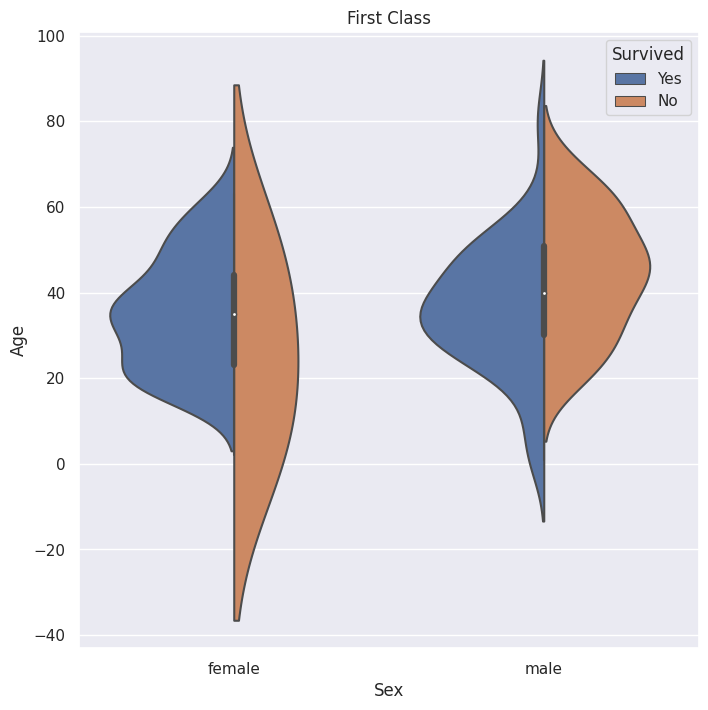

In [278]:
first_class_violin_plot = sns.violinplot(x='Sex', y='Age', data=first_class, hue='Survived', split=True)
plt.title('First Class')
plt.savefig('first_class_violin_plot.png', dpi=300)

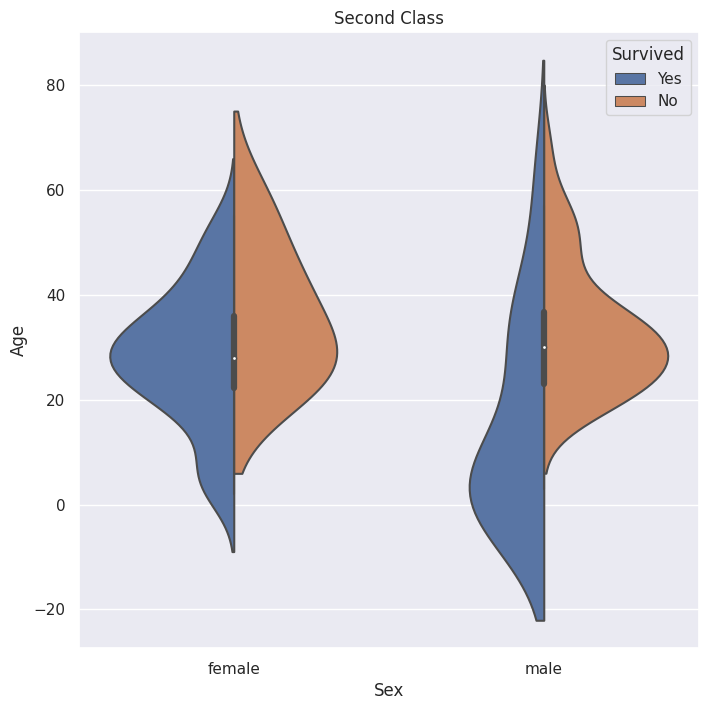

In [279]:
second_class_violin_plot = sns.violinplot(x='Sex', y='Age', data=second_class, hue='Survived', split=True)
plt.title('Second Class')
plt.savefig('second_class_violin_plot.png', dpi=300)

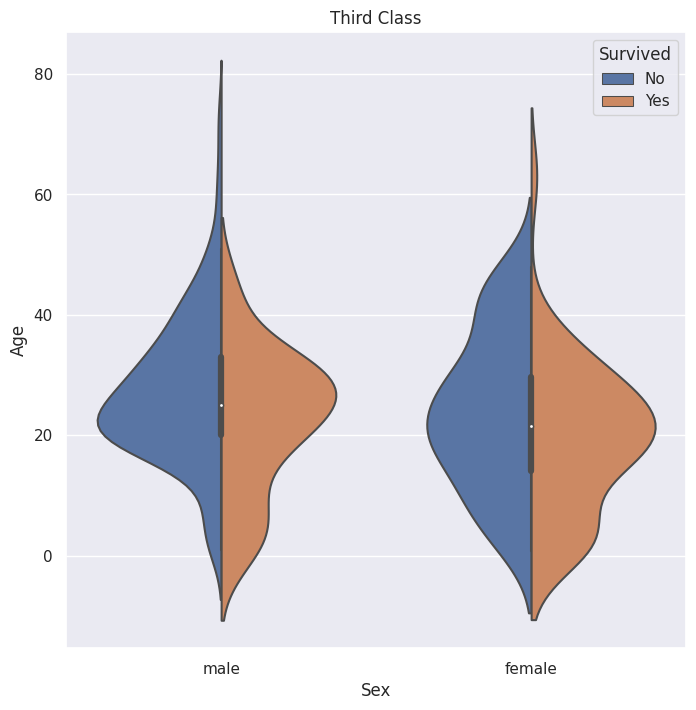

In [280]:
third_class_violin_plot = sns.violinplot(x='Sex', y='Age', data=third_class, hue='Survived', split=True)
plt.title('Third Class')
plt.savefig('third_class_violin_plot.png', dpi=300)

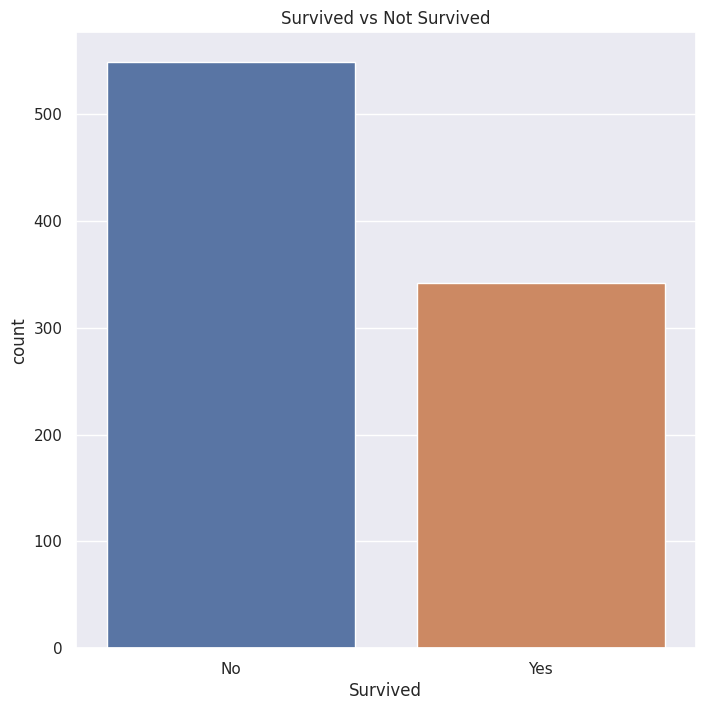

In [281]:
sns.countplot(x='Survived', data=train_viz)
plt.title('Survived vs Not Survived')
plt.savefig('survived_not_survived.png', dpi=300)

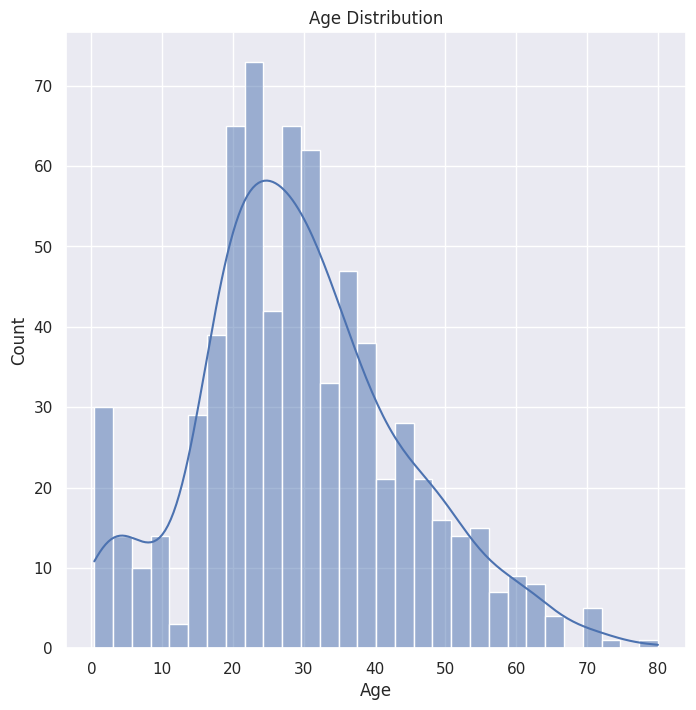

In [282]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.savefig('age_distribution.png', dpi=300)

In [283]:
males = train_viz[train_viz['Sex'] == 'male']
females = train_viz[train_viz['Sex'] == 'female']

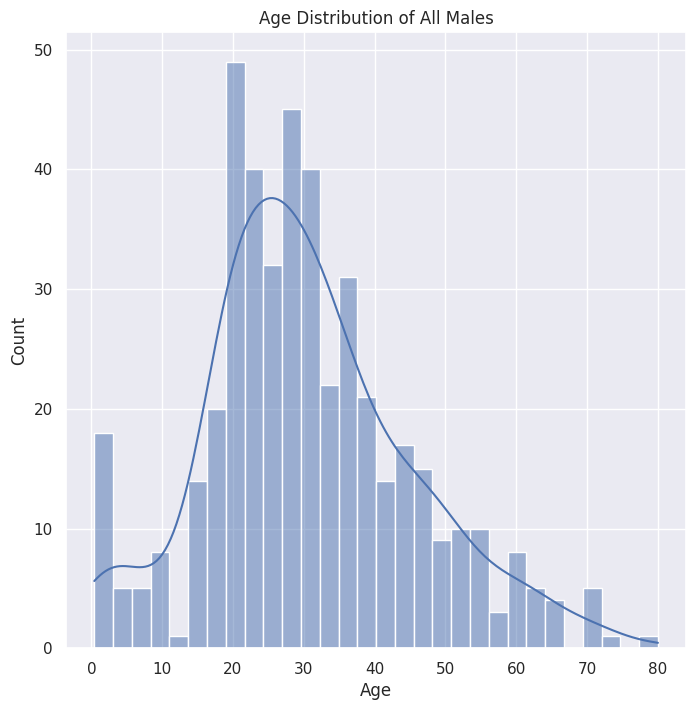

In [284]:
sns.histplot(males['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of All Males')
plt.savefig('age_distribution_of_males.png', dpi=300)

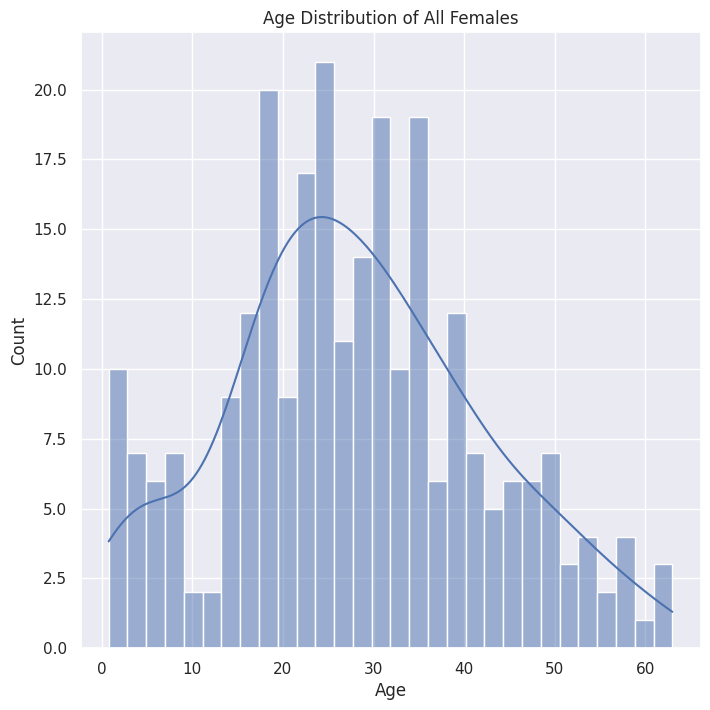

In [285]:
sns.histplot(females['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of All Females')
plt.savefig('age_distribution_of_females.png', dpi=300)

In [286]:
#Create a dataframe to visualize a stacked histplot with kde
age_and_sex = train_viz.copy()
columns = ['Age', 'Sex']
age_and_sex = age_and_sex[columns]
age_and_sex['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

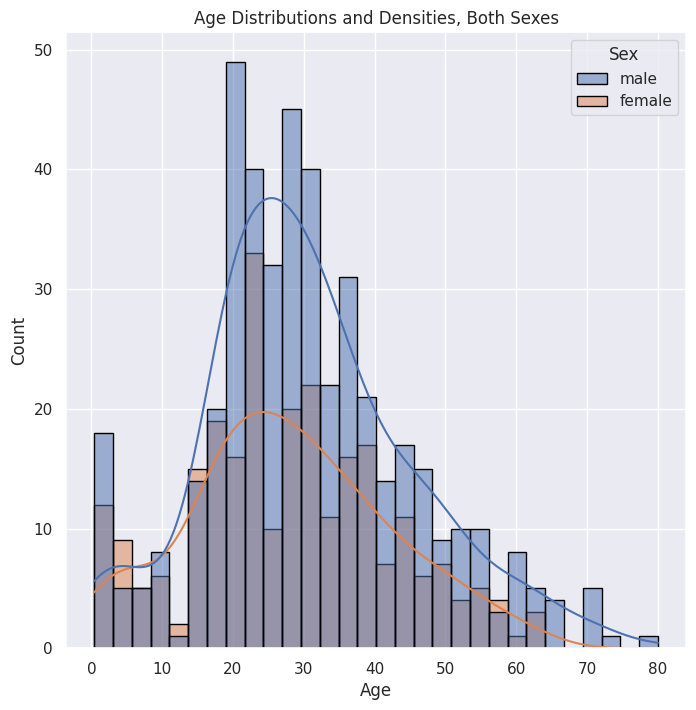

In [287]:
sns.histplot(age_and_sex, x='Age', hue='Sex', bins=30, kde=True, palette='deep', edgecolor='black')
plt.title('Age Distributions and Densities, Both Sexes')
plt.savefig('age_distributions_all.png', dpi=300)

In [288]:
train_viz.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

_______________________________________________________________________________________________________________________________

## Statistical Analysis
#### Develop a correlation matrix

In [289]:
train.corr()

/tmp/ipykernel_2701/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [290]:
#Create fresh dataframe
corr_matrix = train.copy()

#Drop missing values from columns
corr_matrix.dropna(subset=['Age', 'Embarked'], inplace=True)

#Drop the cabin column
corr_matrix.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

#Check missing values counts
corr_matrix.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [291]:
#Copy the training dataset to create a new dataset
to_encode = corr_matrix['Embarked']
to_encode_2 = corr_matrix['Sex']

In [292]:
#Create OneHotEncoder to encode categorical variables of importance
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

#Reshape to_encode
to_encode = to_encode.values.reshape(-1, 1)
to_encode_2 = to_encode_2.values.reshape(-1, 1)

#Encode to_encode
encoded = encoder.fit_transform(to_encode)
encoded_2 = encoder.fit_transform(to_encode_2)

corr_matrix['Embarked'] = encoded
corr_matrix['Sex'] = encoded_2

corr_matrix.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0.0,22.0,1,0,7.2500,0.0
1,2,1,1,1.0,38.0,1,0,71.2833,1.0
2,3,1,3,1.0,26.0,0,0,7.9250,0.0
3,4,1,1,1.0,35.0,1,0,53.1000,0.0
4,5,0,3,0.0,35.0,0,0,8.0500,0.0


In [293]:
#Correlation matrix of preprocessed data
corr_matrix.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029526,-0.035609,-0.024674,0.024674,-0.082704,-0.011672,0.033681,0.009655
Survived,0.029526,1.000000,-0.356462,0.536762,-0.536762,-0.015523,0.095265,-0.082446,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.150826,0.150826,0.065187,0.023666,-0.365902,-0.552893
Sex,-0.024674,0.536762,-0.150826,1.000000,-1.000000,0.106296,0.249543,-0.099037,0.182457
Age,0.024674,-0.536762,0.150826,-1.000000,1.000000,-0.106296,-0.249543,0.099037,-0.182457
SibSp,-0.082704,-0.015523,0.065187,0.106296,-0.106296,1.000000,0.383338,-0.307351,0.139860
Parch,-0.011672,0.095265,0.023666,0.249543,-0.249543,0.383338,1.000000,-0.187896,0.206624
Fare,0.033681,-0.082446,-0.365902,-0.099037,0.099037,-0.307351,-0.187896,1.000000,0.093143
Embarked,0.009655,0.266100,-0.552893,0.182457,-0.182457,0.139860,0.206624,0.093143,1.000000


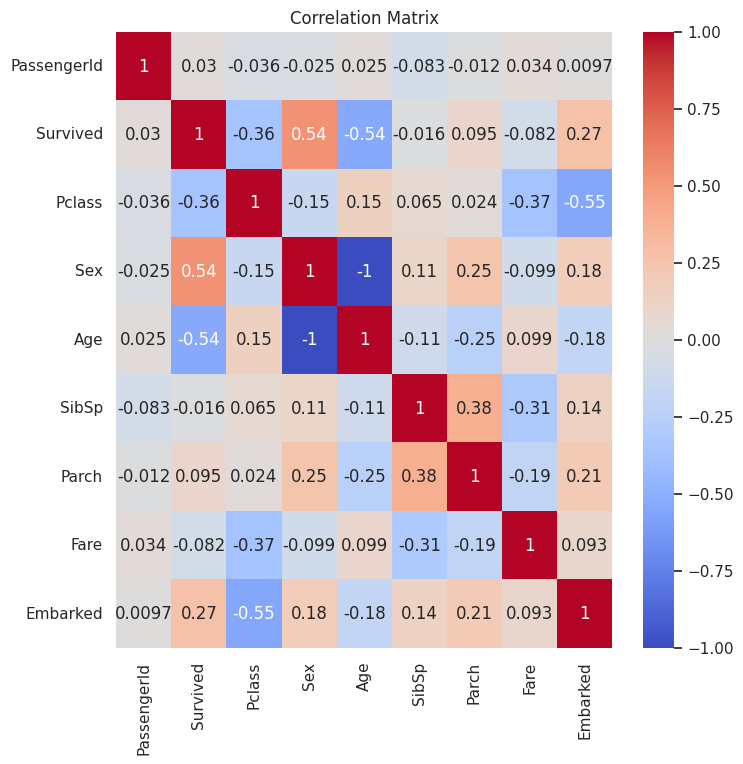

In [294]:
#Create a heatmap of the preprocessed correlation matrix
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png', dpi=300)

/tmp/ipykernel_2701/2185085238.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm')


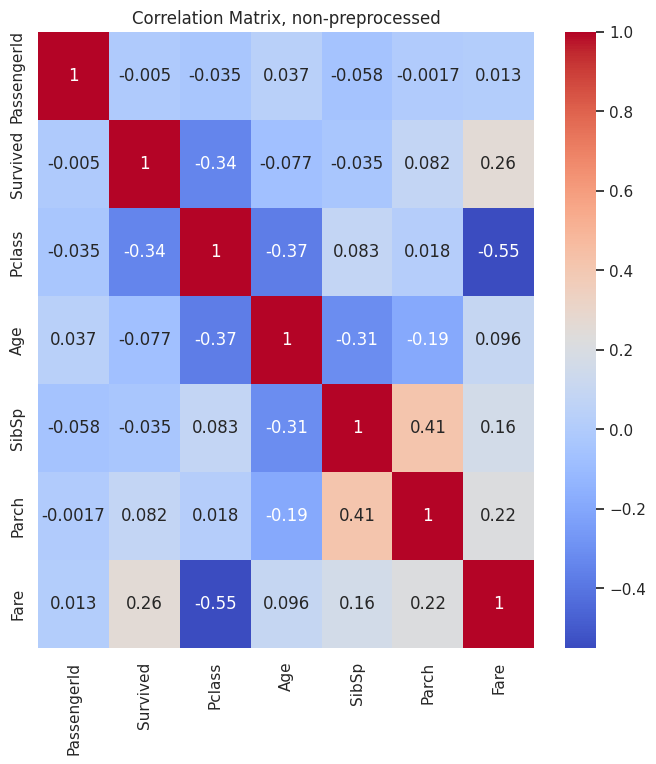

In [295]:
#Heatmap of unpresprocessed correlation matrix
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix, non-preprocessed')
plt.savefig('correlation_matrix_non_preprocessed.png', dpi=300)


In [296]:
stats_frame = train.copy()
stats_frame.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [297]:
#Function to separate passengers by 'Sex' and 'Pclass'
def separate_passengers_by_gender_and_class(df, genders, pclasses):
    frames = []
    for gender in genders:
        for pclass in pclasses:
            frame = df[(df['Sex'] == gender) & (df['Pclass'] == pclass)].copy()
            frames.append(frame)
    return frames

In [298]:
genders = stats_frame['Sex'].unique()
pclasses = stats_frame['Pclass'].unique()

genders.sort()
pclasses.sort()

print(genders)
print(pclasses)

['female' 'male']
[1 2 3]


In [299]:
first_class_women, second_class_women, third_class_women, first_class_men, second_class_men, third_class_men = separate_passengers_by_gender_and_class(stats_frame, genders, pclasses)

In [300]:
#List comprehension to calculate median age for each dataframe in list of dataframes
frames_list = [first_class_men, second_class_men, third_class_men, first_class_women, second_class_women, third_class_women]
median_ages = [df['Age'].median() for df in frames_list]
median_ages

[40.0, 30.0, 25.0, 35.0, 28.0, 21.5]

In [301]:
classes = ['1st Class Males', '2nd Class Males', '3rd Class Males', '1st Class Females', '2nd Class Females', '3rd Class Females']

In [302]:
#Create dictionary from median_ages and classes
median_ages_dict = dict(zip(classes, median_ages))
median_ages_dict

{'1st Class Males': 40.0,
 '2nd Class Males': 30.0,
 '3rd Class Males': 25.0,
 '1st Class Females': 35.0,
 '2nd Class Females': 28.0,
 '3rd Class Females': 21.5}

In [303]:
#Create a dict of the survival rates for each class and gender
survival_rates = dict(zip(classes, [round(df['Survived'].mean() * 100, 2) for df in frames_list]))

survival_rates

{'1st Class Males': 36.89,
 '2nd Class Males': 15.74,
 '3rd Class Males': 13.54,
 '1st Class Females': 96.81,
 '2nd Class Females': 92.11,
 '3rd Class Females': 50.0}

In [304]:
embarkations = stats_frame['Embarked'].value_counts()
embarkations

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [305]:
#Create dataframes of passengers from each embarkation
southampton = stats_frame[stats_frame['Embarked'] == 'S']
cherbourg = stats_frame[stats_frame['Embarked'] == 'C']
queenstown = stats_frame[stats_frame['Embarked'] == 'Q']


In [306]:
#Create a dict of the embarkation location proportions
embarkation_locations = ['Cherbourg', 'Queenstown', 'Southampton']
embarkation_list = [cherbourg, queenstown, southampton]
embarkation_proportions = dict(zip(embarkation_locations, [round((len(df) / len(stats_frame)) * 100, 2) for df in embarkation_list]))
embarkation_proportions

{'Cherbourg': 18.86, 'Queenstown': 8.64, 'Southampton': 72.28}

In [307]:
#Create a dict of passenger class proportions for Cherbourg
cherbourg_first_class = cherbourg[cherbourg['Pclass'] == 1]
cherbourg_second_class = cherbourg[cherbourg['Pclass'] == 2]
cherbourg_third_class = cherbourg[cherbourg['Pclass'] == 3]

cherbourg_classes = ['Cherbourg 1st Class', 'Cherbourg 2nd Class', 'Cherbourg 3rd Class']
cherbourg_class_list = [cherbourg_first_class, cherbourg_second_class, cherbourg_third_class]

cherbourg_class_proportions = dict(zip(cherbourg_classes, [round((len(df) / len(cherbourg)) * 100, 2) for df in cherbourg_class_list]))
cherbourg_class_proportions

{'Cherbourg 1st Class': 50.6,
 'Cherbourg 2nd Class': 10.12,
 'Cherbourg 3rd Class': 39.29}

In [308]:
#Create a dict of passenger class proportions for Queenstown
queenstown_first_class = queenstown[queenstown['Pclass'] == 1]
queenstown_second_class = queenstown[queenstown['Pclass'] == 2]
queenstown_third_class = queenstown[queenstown['Pclass'] == 3]

queenstown_classes = ['Queenstown 1st Class', 'Queenstown 2nd Class', 'Queenstown 3rd Class']
queenstown_class_list = [queenstown_first_class, queenstown_second_class, queenstown_third_class]

queenstown_pclass_proportions = dict(zip(queenstown_classes, [round((len(df) / len(queenstown)) * 100, 2) for df in queenstown_class_list]))
queenstown_pclass_proportions

{'Queenstown 1st Class': 2.6,
 'Queenstown 2nd Class': 3.9,
 'Queenstown 3rd Class': 93.51}

In [309]:
#Create a dict of passenger class proportions for Southampton
southampton_first_class = southampton[southampton['Pclass'] == 1]
southampton_second_class = southampton[southampton['Pclass'] == 2]
southampton_third_class = southampton[southampton['Pclass'] == 3]

southampton_classes = ['Southampton 1st Class', 'Southampton 2nd Class', 'Southampton 3rd Class']
southampton_class_list = [southampton_first_class, southampton_second_class, southampton_third_class]

southampton_pclass_proportions = dict(zip(southampton_classes, [round((len(df) / len(southampton)) * 100, 2) for df in southampton_class_list]))
southampton_pclass_proportions

{'Southampton 1st Class': 19.72,
 'Southampton 2nd Class': 25.47,
 'Southampton 3rd Class': 54.81}

In [310]:
#Create a dict of the survival rates for each embarkation location
embarkation_survival_rates = dict(zip(embarkation_locations, [round(df['Survived'].mean() * 100, 2) for df in embarkation_list]))
embarkation_survival_rates

{'Cherbourg': 55.36, 'Queenstown': 38.96, 'Southampton': 33.7}

____________________________________________________________________________________________________________________________________________________________

## Perform Preprocessing

In [311]:
train_data = train.copy()

In [312]:
#Reset index to PassengerId
train_data.set_index('PassengerId', inplace=True)

In [313]:
#Create list of attributes for preprocessing pipeline
num_attribs = ['Parch', 'Age', 'SibSp', 'Fare']
cat_attribs = ['Pclass', 'Embarked', 'Sex']

In [314]:
#Create pipeline for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),   
])

cat_pipeline = Pipeline([
    ("one_hot_encoder", OneHotEncoder()),
    ("imputer", SimpleImputer(strategy="median")),
])

In [315]:
#Create preprocessing pipeline
from sklearn.compose import ColumnTransformer

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])
y_train = train_data['Survived']

X_train

array([[-0.47367361, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47367361,  0.66386103,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.47367361, -0.25833709, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 2.00893337, -0.1046374 ,  0.43279337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.47367361, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.47367361,  0.20276197, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ]])

_______________________________________________________________________________________________________________________________

## Build Models

#### SVM Classifier

In [316]:
#Create SVM classifier
from sklearn.svm import SVC

svm_clf = SVC()

#Train the model
svm_clf.fit(X_train, y_train)

SVC()

In [317]:
#Score the model
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8226966292134831

In [318]:
#Classification Report
from sklearn.metrics import classification_report

svm_clf_report = classification_report(y_train, svm_clf.predict(X_train))
print(svm_clf_report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       549
           1       0.83      0.73      0.77       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.84      0.84      0.84       891



In [319]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

svm_clf_matrix = confusion_matrix(y_train, svm_clf.predict(X_train))

print(svm_clf_matrix)

[[497  52]
 [ 93 249]]


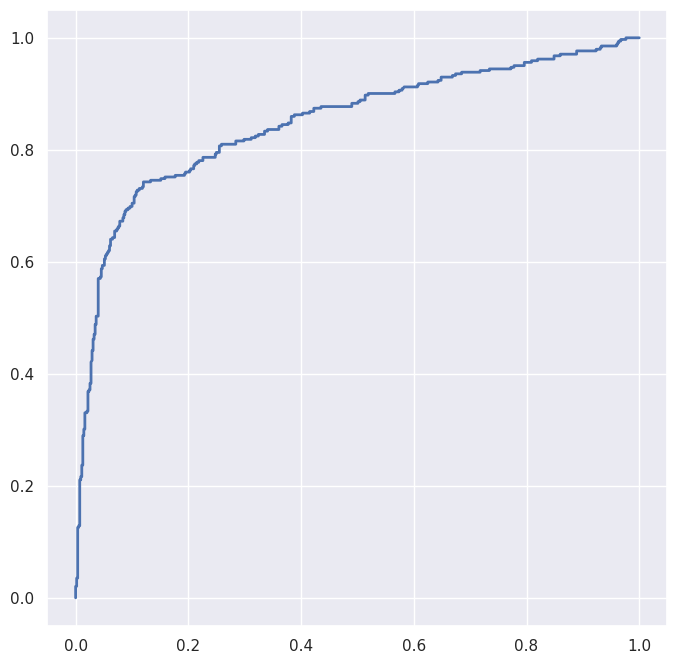

In [320]:
#Display the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=10, method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plt.plot(fpr, tpr, linewidth=2)

#### XGBoost Classifier

In [321]:
#Create XGBoost classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

#Train the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [322]:
#Score the model
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10)

xgb_scores.mean()

0.8125967540574284

In [323]:
#Classification Report
xgb_clf_report = classification_report(y_train, xgb_clf.predict(X_train))
print(xgb_clf_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       549
           1       0.97      0.94      0.95       342

    accuracy                           0.96       891
   macro avg       0.97      0.96      0.96       891
weighted avg       0.96      0.96      0.96       891



In [324]:
#Confusion Matrix
xgb_clf_matrix = confusion_matrix(y_train, xgb_clf.predict(X_train))
print(xgb_clf_matrix)

[[539  10]
 [ 22 320]]


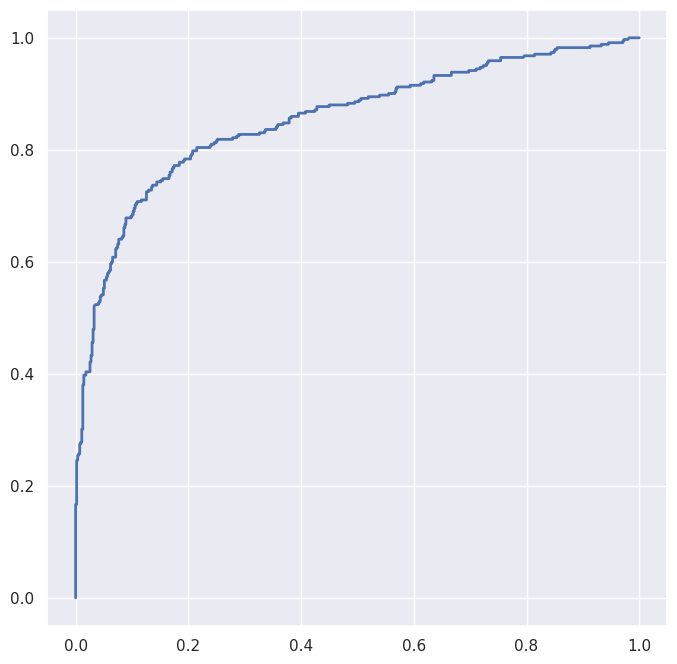

In [325]:
#Display the ROC Curve
y_scores = cross_val_predict(xgb_clf, X_train, y_train, cv=10, method="predict_proba")

fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])

plt.plot(fpr, tpr, linewidth=2)

#### RandomForestClassifier

In [326]:
#Create RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

In [327]:
#fit the model
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [328]:
#Score the model
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8160049937578027

In [329]:
#Classification Report
forest_clf_report_2 = classification_report(y_train, forest_clf.predict(X_train))
print(forest_clf_report_2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



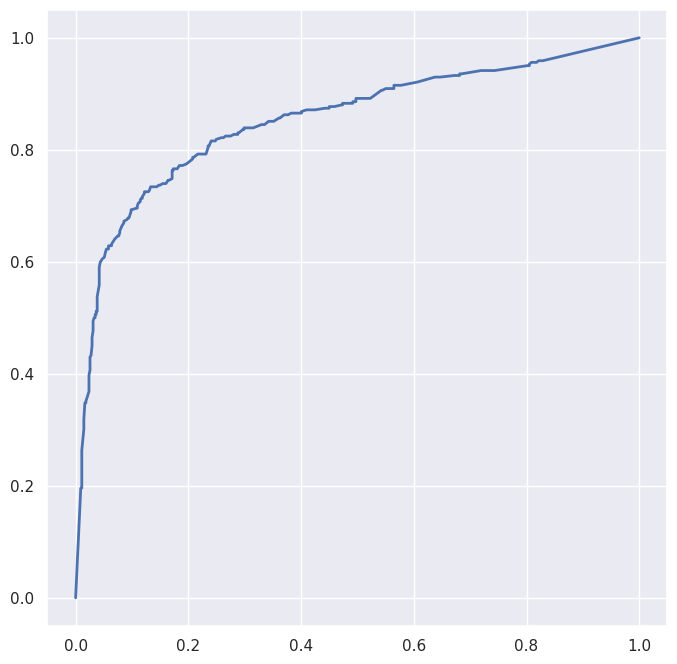

In [330]:
#Display ROC Curve for RandomForestClassifier
y_scores = cross_val_predict(forest_clf, X_train, y_train, cv=10, method="predict_proba")

fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])

plt.plot(fpr, tpr, linewidth=2)